In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import sqlite3
import os

In [2]:
import os
import json

kaggle_json_path = r"C:\Users\ayush\OneDrive\Documents\Elevate_project\kaggle\kaggle.json"

with open(kaggle_json_path, "r") as f:
    kaggle_token = json.load(f)

kaggle_dir = os.path.expanduser("~/.kaggle")
os.makedirs(kaggle_dir, exist_ok=True)

# Write kaggle.json to the expected directory
kaggle_dest = os.path.join(kaggle_dir, "kaggle.json")
with open(kaggle_dest, "w") as f:
    json.dump(kaggle_token, f)

# Set file permission (important for Linux/Mac; on Windows it’s safe)
try:
    os.chmod(kaggle_dest, 0o600)
except:
    pass  # Windows might not support chmod

print("✅ kaggle.json has been set up successfully.")


✅ kaggle.json has been set up successfully.


In [ ]:
!kaggle datasets download -d datasnaek/youtube-new


In [ ]:
!unzip youtube-new.zip -d data/

In [ ]:
from kaggle.api.kaggle_api_extended import KaggleApi
import zipfile

# Authenticate Kaggle API
api = KaggleApi()
api.authenticate()

# Download dataset zip
api.dataset_download_files('datasnaek/youtube-new', path='.', unzip=False)
print("Download complete!")

# Unzip dataset
with zipfile.ZipFile('youtube-new.zip', 'r') as zip_ref:
    zip_ref.extractall('data')
print("Extraction complete!")


In [2]:
data_folder = 'data'
files = os.listdir(data_folder)
print("Files in data folder:", files)

# Load US trending videos dataset as example
us_df = pd.read_csv(os.path.join(data_folder, 'USvideos.csv'))

print(us_df.head())
print(f"Number of rows: {len(us_df)}")
print(f"Columns: {us_df.columns.tolist()}")


Files in data folder: ['CAvideos.csv', 'CA_category_id.json', 'DEvideos.csv', 'DE_category_id.json', 'FRvideos.csv', 'FR_category_id.json', 'GBvideos.csv', 'GB_category_id.json', 'INvideos.csv', 'IN_category_id.json', 'JPvideos.csv', 'JP_category_id.json', 'KRvideos.csv', 'KR_category_id.json', 'MXvideos.csv', 'MX_category_id.json', 'RUvideos.csv', 'RU_category_id.json', 'USvideos.csv', 'US_category_id.json']
      video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   

In [3]:
import json

# Convert dates
us_df['trending_date'] = pd.to_datetime(us_df['trending_date'], format='%y.%d.%m')
us_df['publish_time'] = pd.to_datetime(us_df['publish_time'])

# Load category mapping
with open('data/US_category_id.json') as f:
    categories = json.load(f)

# Create a dictionary for category_id -> category_name
cat_dict = {int(item['id']): item['snippet']['title'] for item in categories['items']}

# Map category names
us_df['category_name'] = us_df['category_id'].map(cat_dict)

us_df[['category_id', 'category_name']].drop_duplicates()


,category_id,category_name
0,22,People & Blogs
1,24,Entertainment
2,23,Comedy
5,28,Science & Technology
8,1,Film & Animation
9,25,News & Politics
10,17,Sports
12,10,Music
14,15,Pets & Animals
17,27,Education


In [4]:
from textblob import TextBlob

# Simple function to get polarity
def get_sentiment(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return 0

# Apply sentiment analysis on title and tags
us_df['title_sentiment'] = us_df['title'].apply(get_sentiment)
us_df['tags_sentiment'] = us_df['tags'].apply(get_sentiment)

# Quick check
us_df[['title', 'title_sentiment', 'tags', 'tags_sentiment']].head()


,title,title_sentiment,tags,tags_sentiment
0,WE WANT TO TALK ABOUT OUR MARRIAGE,0.00,SHANtell martin,0.000000
1,The Trump Presidency: Last Week Tonight with J...,0.00,"last week tonight trump presidency|""last week ...",0.000000
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",0.00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",0.111111
3,Nickelback Lyrics: Real or Fake?,-0.75,"rhett and link|""gmm""|""good mythical morning""|""...",0.266667
4,I Dare You: GOING BALD!?,0.00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",-0.350000


C:\Users\ayush\AppData\Local\Temp\ipykernel_12588\1599881479.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_views.index, y=avg_views.values, palette='viridis')


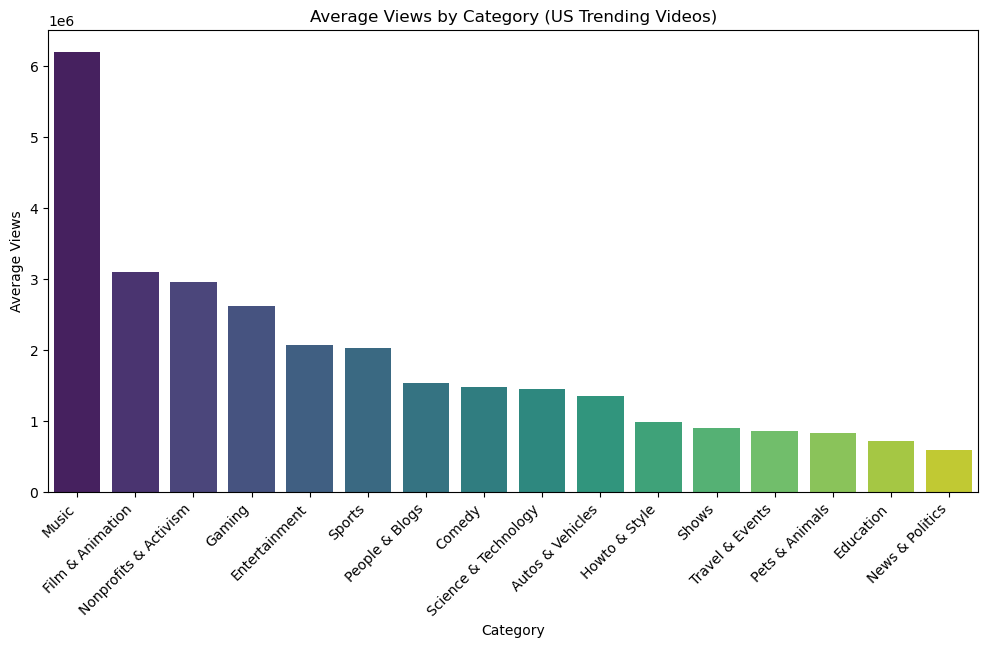

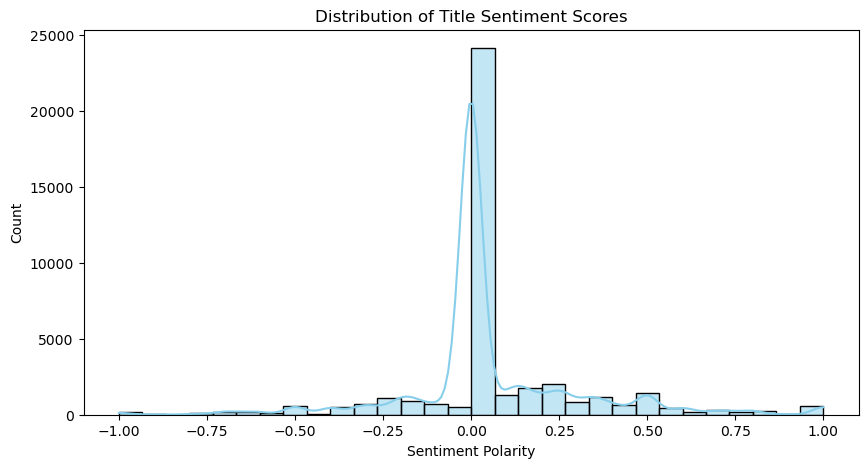

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Avg views by category
avg_views = us_df.groupby('category_name')['views'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_views.index, y=avg_views.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title("Average Views by Category (US Trending Videos)")
plt.ylabel("Average Views")
plt.xlabel("Category")
plt.show()

# Sentiment distribution of titles
plt.figure(figsize=(10,5))
sns.histplot(us_df['title_sentiment'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Title Sentiment Scores")
plt.xlabel("Sentiment Polarity")
plt.show()


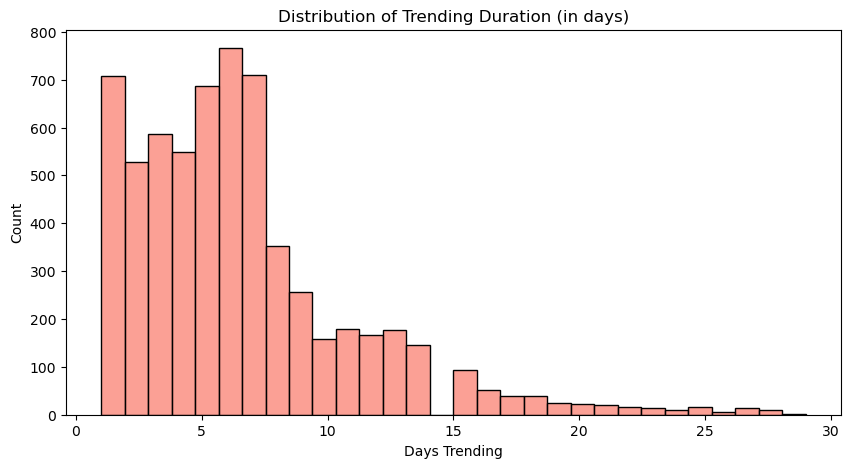

In [6]:
trending_duration = us_df.groupby('video_id')['trending_date'].nunique().reset_index()
trending_duration.columns = ['video_id', 'days_trending']

plt.figure(figsize=(10,5))
sns.histplot(trending_duration['days_trending'], bins=30, color='salmon')
plt.title("Distribution of Trending Duration (in days)")
plt.xlabel("Days Trending")
plt.show()


In [7]:
import pandas as pd
import json

# Load datasets for each region and add a 'region' column
regions = ['US', 'GB', 'IN', 'CA', 'DE']
data_frames = []
for region in regions:
    df = pd.read_csv(f'data/{region}videos.csv')
    df['region'] = region
    data_frames.append(df)

combined_df = pd.concat(data_frames, ignore_index=True)

# Load category mappings for each region (using US as standard)
with open('data/US_category_id.json') as f:
    cat_data = json.load(f)

categories = {int(item['id']): item['snippet']['title'] for item in cat_data['items']}

combined_df['category_name'] = combined_df['category_id'].map(categories)

# Check data
combined_df[['region', 'category_name', 'views']].head()


,region,category_name,views
0,US,People & Blogs,748374
1,US,Entertainment,2418783
2,US,Comedy,3191434
3,US,Entertainment,343168
4,US,Entertainment,2095731


In [8]:
import sqlite3

# Create SQLite in-memory database and load data
conn = sqlite3.connect(':memory:')
combined_df.to_sql('videos', conn, index=False, if_exists='replace')

query = """
SELECT region, category_name,
       ROUND(AVG(views)) as avg_views,
       COUNT(video_id) as video_count
FROM videos
GROUP BY region, category_name
ORDER BY region, avg_views DESC;
"""

ranked_categories = pd.read_sql_query(query, conn)
print(ranked_categories.head(10))


  region          category_name  avg_views  video_count
0     CA                  Music  3532525.0         3731
1     CA                 Movies  2853415.0            6
2     CA  Nonprofits & Activism  1562184.0           74
3     CA       Film & Animation  1426729.0         2060
4     CA   Science & Technology  1233845.0         1155
5     CA                 Sports  1075584.0         2787
6     CA          Entertainment  1016372.0        13451
7     CA                 Comedy   982889.0         3773
8     CA                 Gaming   923759.0         1344
9     CA         People & Blogs   786414.0         4105


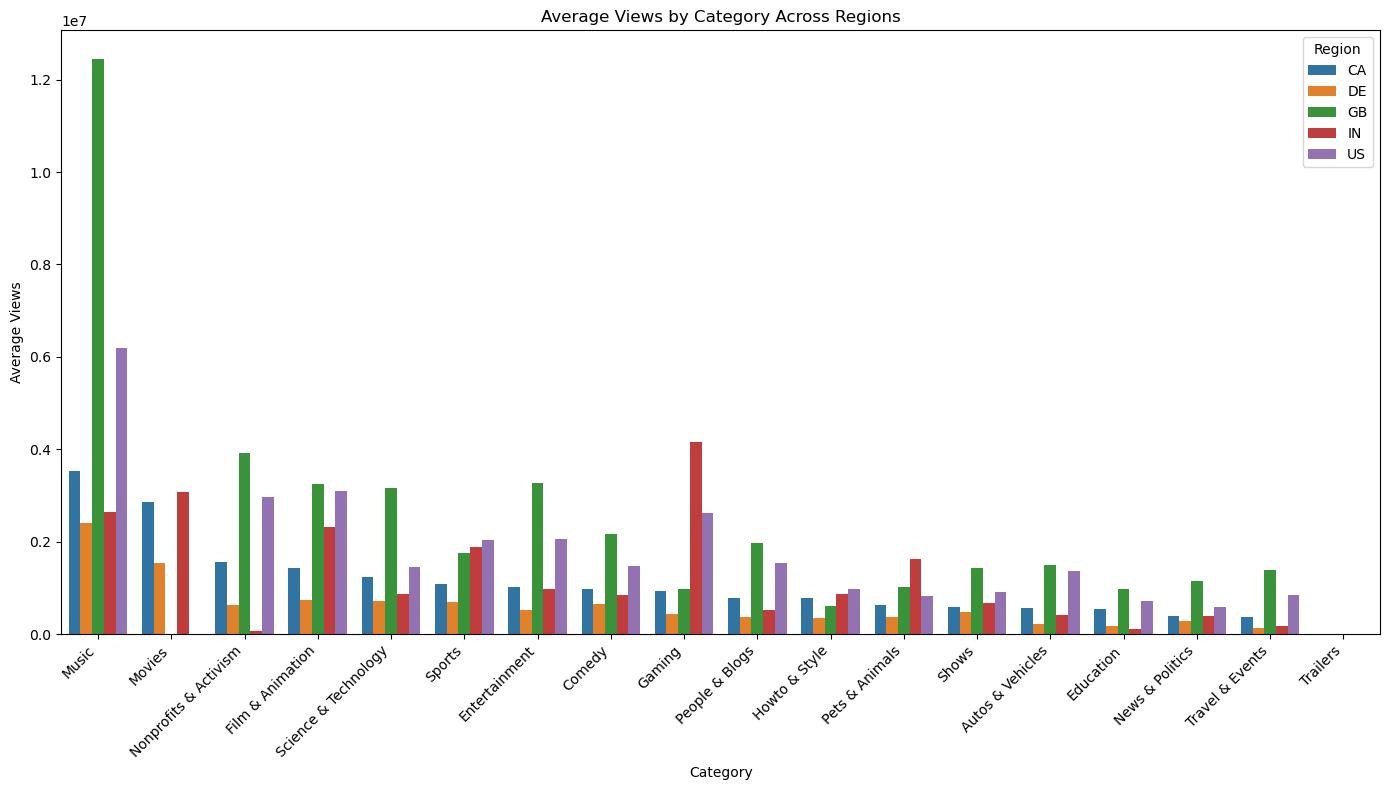

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,8))
sns.barplot(data=ranked_categories, x='category_name', y='avg_views', hue='region')
plt.xticks(rotation=45, ha='right')
plt.title("Average Views by Category Across Regions")
plt.ylabel("Average Views")
plt.xlabel("Category")
plt.legend(title='Region')
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd

# Fix trending_date format (example: '17.14.11' means 2017-11-14)
def parse_trending_date(date_str):
    # Original is 'yy.dd.mm' - rearranged to 'yy.mm.dd'
    # Actually, Kaggle dataset format is 'yy.dd.mm' as per their doc
    # So convert '17.14.11' to '2017-11-14'
    parts = date_str.split('.')
    return pd.to_datetime(f"20{parts[0]}-{parts[2]}-{parts[1]}")

combined_df['trending_date_dt'] = combined_df['trending_date'].apply(parse_trending_date)

# Also parse publish_time to datetime
combined_df['publish_time_dt'] = pd.to_datetime(combined_df['publish_time'])

# Calculate trending duration by video and region (number of unique trending days)
duration_df = combined_df.groupby(['video_id', 'region']).agg(
    first_trend=('trending_date_dt', 'min'),
    last_trend=('trending_date_dt', 'max'),
    trending_days=('trending_date_dt', 'nunique'),
    category_name=('category_name', 'first')
).reset_index()

duration_df['trend_duration_days'] = (duration_df['last_trend'] - duration_df['first_trend']).dt.days + 1

duration_df.head()


,video_id,region,first_trend,last_trend,trending_days,category_name,trend_duration_days
0,#NAME?,IN,2017-11-14,2018-06-14,186,Entertainment,213
1,#VALUE!,IN,2018-03-09,2018-03-21,7,Education,13
2,--45ws7CEN0,CA,2018-06-12,2018-06-12,1,Gaming,1
3,--7vNbh4UNA,CA,2018-04-14,2018-04-16,3,News & Politics,3
4,--7vNbh4UNA,DE,2018-04-14,2018-04-14,1,News & Politics,1


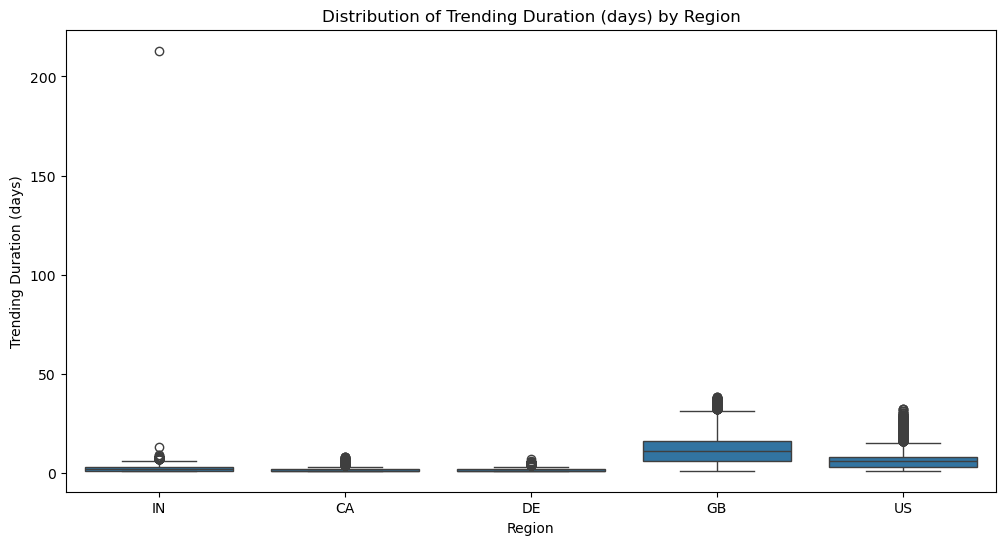

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(data=duration_df, x='region', y='trend_duration_days')
plt.title('Distribution of Trending Duration (days) by Region')
plt.ylabel('Trending Duration (days)')
plt.xlabel('Region')
plt.show()


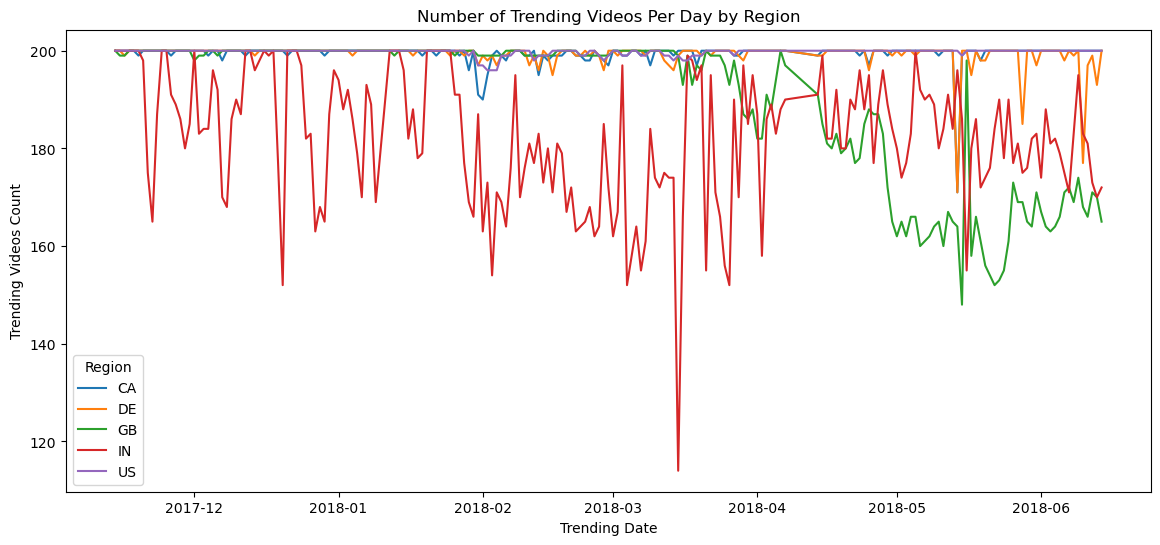

In [12]:
daily_trends = combined_df.groupby(['region', 'trending_date_dt']).size().reset_index(name='count')

plt.figure(figsize=(14,6))
sns.lineplot(data=daily_trends, x='trending_date_dt', y='count', hue='region')
plt.title('Number of Trending Videos Per Day by Region')
plt.xlabel('Trending Date')
plt.ylabel('Trending Videos Count')
plt.legend(title='Region')
plt.show()

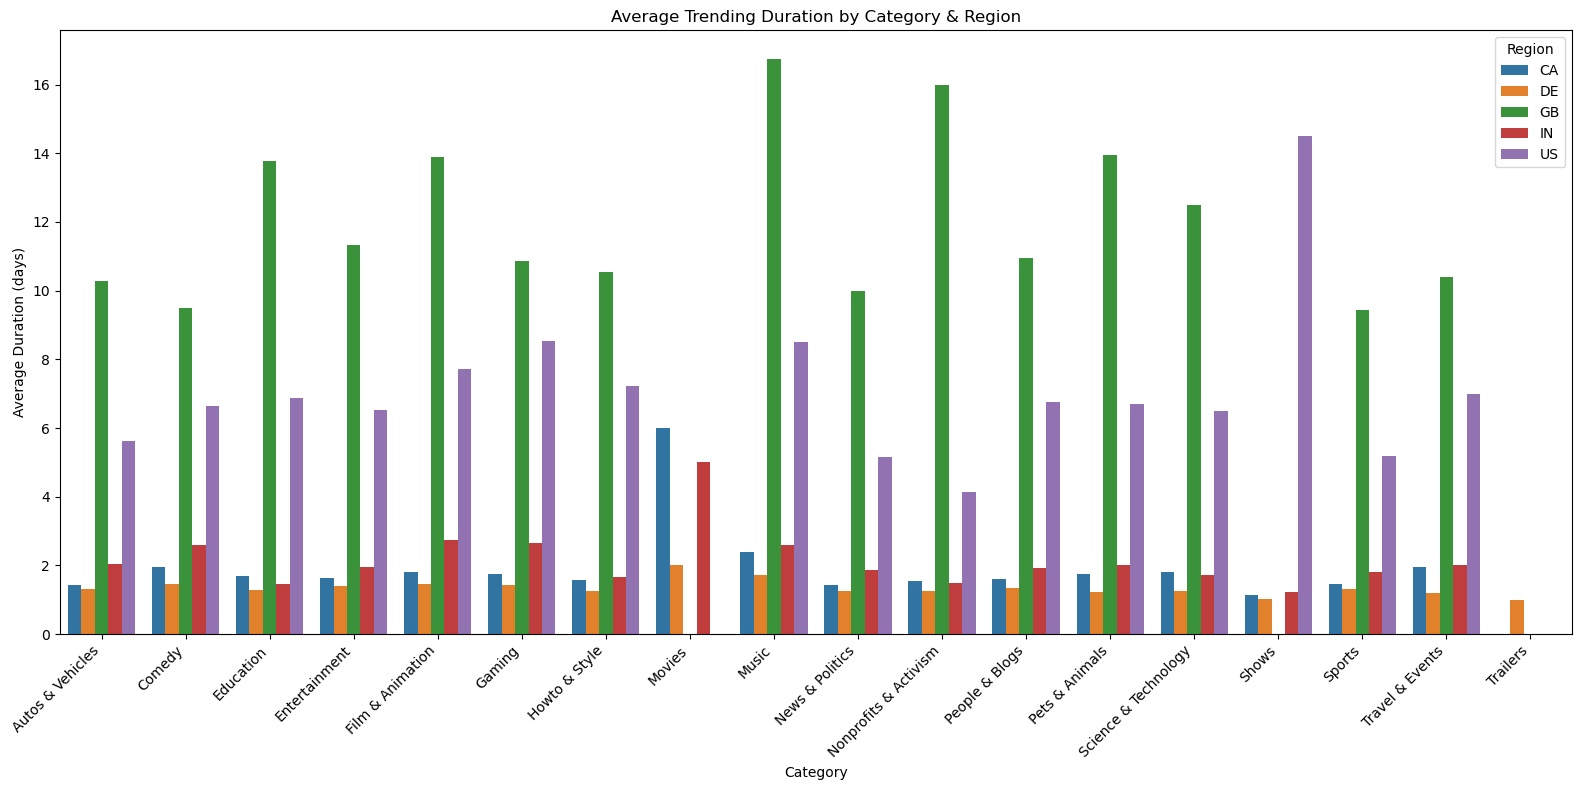

In [13]:
avg_duration_cat = duration_df.groupby(['region', 'category_name'])['trend_duration_days'].mean().reset_index()

plt.figure(figsize=(16,8))
sns.barplot(data=avg_duration_cat, x='category_name', y='trend_duration_days', hue='region')
plt.xticks(rotation=45, ha='right')
plt.title('Average Trending Duration by Category & Region')
plt.ylabel('Average Duration (days)')
plt.xlabel('Category')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [14]:
from textblob import TextBlob

In [15]:
def get_sentiment(text):
    if pd.isnull(text):
        return 0.0, 0.0
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

In [16]:
combined_df['title_sentiment'] = combined_df['title'].apply(lambda x: get_sentiment(x)[0])
combined_df['title_subjectivity'] = combined_df['title'].apply(lambda x: get_sentiment(x)[1])

combined_df['tags_sentiment'] = combined_df['tags'].apply(lambda x: get_sentiment(x)[0])
combined_df['tags_subjectivity'] = combined_df['tags'].apply(lambda x: get_sentiment(x)[1])

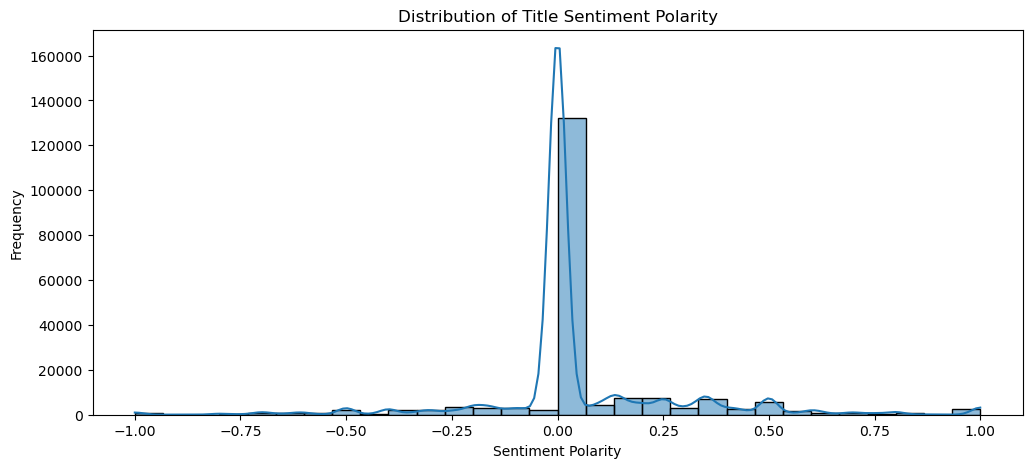

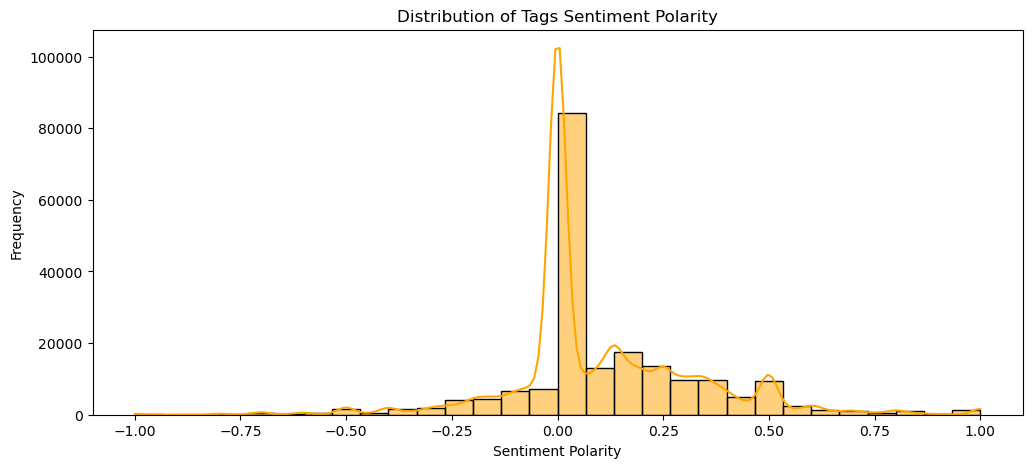

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.histplot(combined_df['title_sentiment'], bins=30, kde=True)
plt.title('Distribution of Title Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(combined_df['tags_sentiment'], bins=30, kde=True, color='orange')
plt.title('Distribution of Tags Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

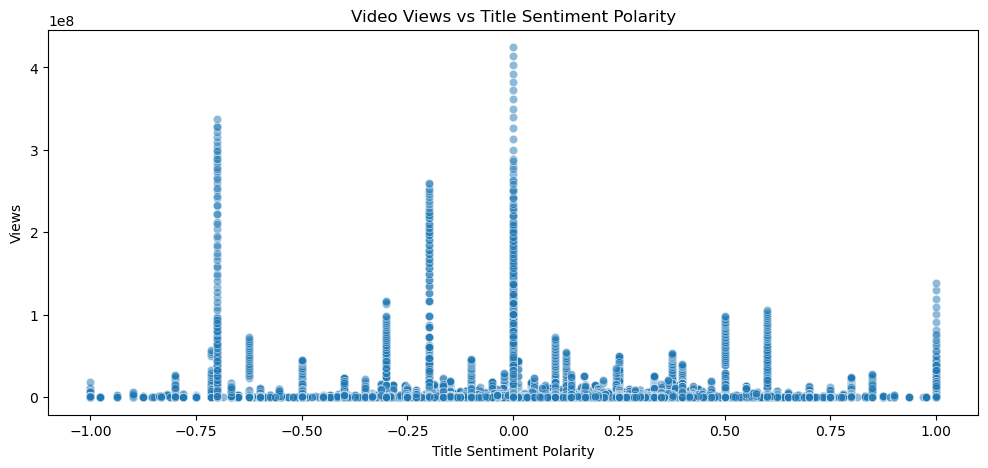

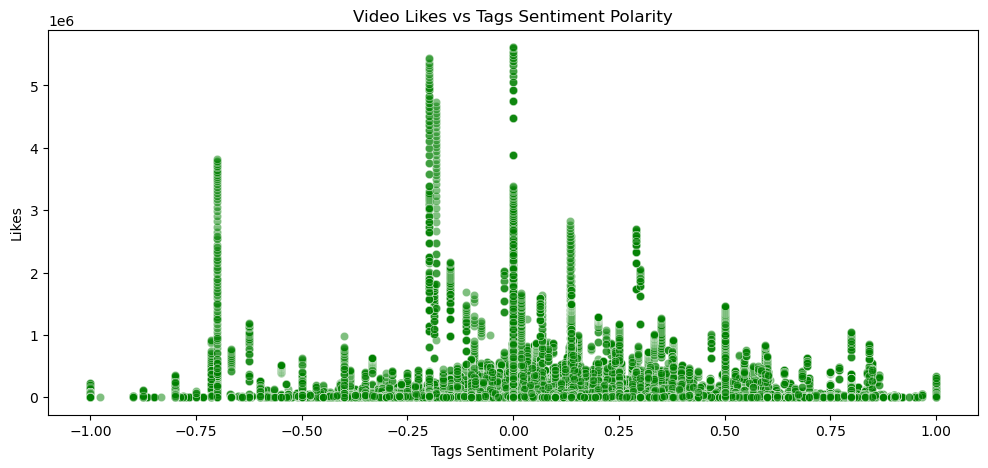

In [18]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='title_sentiment', y='views', data=combined_df, alpha=0.5)
plt.title('Video Views vs Title Sentiment Polarity')
plt.xlabel('Title Sentiment Polarity')
plt.ylabel('Views')
plt.show()

plt.figure(figsize=(12,5))
sns.scatterplot(x='tags_sentiment', y='likes', data=combined_df, alpha=0.5, color='green')
plt.title('Video Likes vs Tags Sentiment Polarity')
plt.xlabel('Tags Sentiment Polarity')
plt.ylabel('Likes')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Select features
features = combined_df[['category_id', 'title_sentiment', 'tags_sentiment', 'region']]

# Target variable
target = combined_df['views']

# Encode categorical 'region'
le = LabelEncoder()
features['region_encoded'] = le.fit_transform(features['region'])

# Drop original 'region' column
features = features.drop(columns=['region'])

# Fill missing values if any
features = features.fillna(0)

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


C:\Users\ayush\AppData\Local\Temp\ipykernel_12588\3207797783.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['region_encoded'] = le.fit_transform(features['region'])


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 43195999797882.78
R^2 Score: 0.51


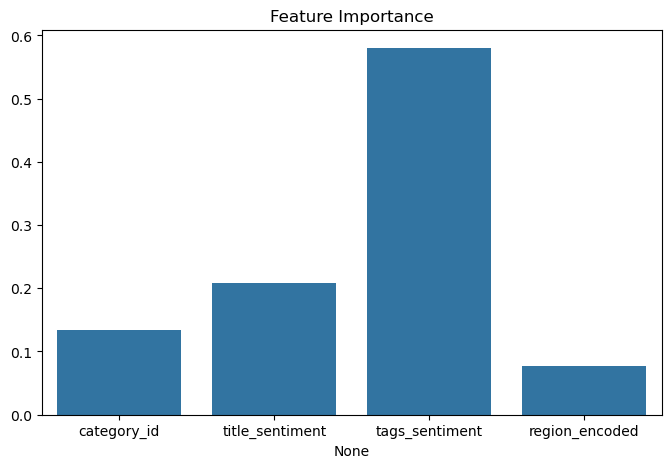

In [21]:
importances = model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(8,5))
sns.barplot(x=feature_names, y=importances)
plt.title("Feature Importance")
plt.show()

In [22]:
pip install dash plotly

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install --upgrade typing_extensions

Note: you may need to restart the kernel to use updated packages.


In [24]:
!pip install --upgrade typing_extensions

In [25]:
import dash
from dash import dcc, html
import plotly.express as px

In [29]:
import dash
from dash import dcc, html
import plotly.express as px

# Example data calculations
category_views = combined_df.groupby('category_id')['views'].mean().reset_index()
category_likes = combined_df.groupby('category_id')['likes'].mean().reset_index()
category_comments = combined_df.groupby('category_id')['comment_count'].mean().reset_index()

# Dash app setup
app = dash.Dash(__name__)

# Create figures
fig_views = px.bar(category_views, x='category_id', y='views', title='Average Views by Category ID')
fig_likes = px.bar(category_likes, x='category_id', y='likes', title='Average Likes by Category ID')
fig_comments = px.bar(category_comments, x='category_id', y='comment_count', title='Average Comments by Category ID')

# Layout with multiple graphs
app.layout = html.Div([
    html.H1("YouTube Trending Dashboard"),
    dcc.Graph(figure=fig_views),
    dcc.Graph(figure=fig_likes),
    dcc.Graph(figure=fig_comments)
])

if __name__ == '__main__':
    app.run(debug=True)  # ✅ Updated method


In [30]:
combined_df.to_csv("youtube_trending_cleaned.csv", index=False)